## Load Data from CSVs

In [52]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [53]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

with open('daily_engagement.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)

with open('project_submissions.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)

## Fixing Data Types

In [54]:
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', '2015-01-09'),
             ('num_courses_visited', '1.0'),
             ('total_minutes_visited', '11.6793745'),
             ('lessons_completed', '0.0'),
             ('projects_completed', '0.0')])

In [55]:
project_submissions[0]

OrderedDict([('creation_date', '2015-01-14'),
             ('completion_date', '2015-01-16'),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

In [56]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [57]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [58]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

## Investigating the Data

In [59]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

print('Total number of rows', len(enrollments))

s_enrollments = set()

for elem in enrollments:
    s_enrollments.add(elem['account_key'])

print('Number of unique students', len(s_enrollments))

Total number of rows 1640
Number of unique students 1302


In [60]:
s_daily_engagement = set()
for each in daily_engagement:
    s_daily_engagement.add(each['acct'])
    
engagement_num_rows = len(daily_engagement)           
engagement_num_unique_students = len(s_daily_engagement)

print('engagement_num_rows', engagement_num_rows)
print('engagement_num_unique_students', engagement_num_unique_students)

engagement_num_rows 136240
engagement_num_unique_students 1237


In [61]:
s_project_submissions = set()
for cada in project_submissions:
    s_project_submissions.add(cada['account_key'])
    
submission_num_rows = len(project_submissions)           
submission_num_unique_students = len(s_project_submissions)  

print('submission_num_rows', submission_num_rows)
print('submission_num_unique_students', submission_num_unique_students)

submission_num_rows 3642
submission_num_unique_students 743


In [62]:
daily_engagement[0]['acct']

'0'

## Problems in the Data

In [63]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

for each in daily_engagement:
    each['account_key'] = each['acct']
    del each['acct']

In [64]:
print(daily_engagement[0]['account_key'])

0


In [65]:
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

In [66]:
len(enrollments)

1640

In [67]:
unique_enrolled_students = get_unique_students(enrollments)
len(unique_enrolled_students)

1302

In [68]:
len(daily_engagement)

136240

In [69]:
unique_engagement_students = get_unique_students(daily_engagement)
len(unique_engagement_students)

1237

In [70]:
len(project_submissions)

3642

In [71]:
unique_project_submitters = get_unique_students(project_submissions)
len(unique_project_submitters)

743

## Missing Engagement Records

In [72]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

i = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if i < 5:
        if student not in unique_engagement_students:
            print(enrollment)
            i += 1

OrderedDict([('account_key', '1219'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 12, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])
OrderedDict([('account_key', '871'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 13, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 13, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])
OrderedDict([('account_key', '1218'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 15, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 15, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])
OrderedDict([('account_key', '654'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 12, 4, 0, 0)), ('cancel_date', datetime.datetime(2014, 12, 4, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])
OrderedDict([('account_key', '654'),

## Checking for More Problem Records

In [73]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students and enrollment['join_date'] != enrollment['cancel_date']:
        print(enrollment)

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])


## Tracking Down the Remaining Problems

In [74]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [75]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [76]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [77]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}

for enrollment in non_udacity_enrollments:
    
    if enrollment['days_to_cancel'] is None or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
    
        if account_key not in paid_students or enrollment_date > paid_students[account_key]:
                paid_students[account_key] = enrollment['join_date']

In [78]:
len(paid_students)

995

## Getting Data from First Week

In [79]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >=0

In [80]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []

for engagement in non_udacity_engagement:
    
    account_key = engagement['account_key']
    
    if account_key in paid_students:
        join_date = paid_students[account_key]
    
        if within_one_week(join_date, engagement['utc_date']): 
            paid_engagement_in_first_week.append(engagement)

In [81]:
len(non_udacity_engagement)

135656

In [82]:
len(paid_engagement_in_first_week)

6919

## Exploring Student Engagement

In [83]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [84]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [85]:
# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
total_minutes = list(total_minutes)

In [86]:
import numpy as np

print('Mean:', np.mean(total_minutes))
print('Standard deviation:', np.std(total_minutes))
print('Minimum:', np.min(total_minutes))
print('Maximum:', np.max(total_minutes))

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


## Debugging Data Analysis Code

In [87]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

for account_key in total_minutes_by_account:
    if total_minutes_by_account[account_key] == np.max(total_minutes):
        print(account_key)

163


In [88]:
for each in engagement_by_account["163"]:
    print(each['total_minutes_visited'])

850.519339666
872.633923334
777.018903666
294.568774
471.2139785
298.778345333
0.0


In [89]:
for enrollment in non_udacity_enrollments:
    if enrollment['account_key'] == '108':
        print(enrollment)

OrderedDict([('account_key', '108'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 7, 0, 0)), ('cancel_date', datetime.datetime(2015, 4, 20, 0, 0)), ('days_to_cancel', 103), ('is_udacity', False), ('is_canceled', True)])
OrderedDict([('account_key', '108'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 4, 20, 0, 0)), ('cancel_date', datetime.datetime(2015, 5, 14, 0, 0)), ('days_to_cancel', 24), ('is_udacity', False), ('is_canceled', True)])


In [90]:
a = dt(2015, 1, 26) # engagement before second enrollment 

b = dt(2015, 4, 20, 0, 0) # second enrollment 

a-b

datetime.timedelta(-84)

## Lessons Completed in First Week

In [91]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

def group_data(data, key_name):
    
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
        
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')

In [92]:
def sum_grouped_items(grouped_data, field_name):
    
    summed_data_by_fieldname = {}
    
    for key, data_points in grouped_data.items():
        total_sum = 0
        for data_point in data_points:
            total_sum += data_point[field_name]      
        summed_data_by_fieldname[key] = total_sum
            
    return summed_data_by_fieldname

total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')

In [93]:
def describe_data(summed_data):

    data = summed_data.values()
    data = list(data)

    print('Mean:', np.mean(data))
    print('Standard deviation:', np.std(data))
    print('Minimum:', np.min(data))
    print('Maximum:', np.max(data))

describe_data(total_minutes_by_account)

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


In [94]:
lessons_completed = sum_grouped_items(engagement_by_account, "lessons_completed")
describe_data(lessons_completed)

Mean: 1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [95]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

In [96]:
engagement_by_account["0"]

[OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
              ('num_courses_visited', 1),
              ('total_minutes_visited', 11.6793745),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '0')]),
 OrderedDict([('utc_date', datetime.datetime(2015, 1, 10, 0, 0)),
              ('num_courses_visited', 2),
              ('total_minutes_visited', 37.2848873333),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '0')]),
 OrderedDict([('utc_date', datetime.datetime(2015, 1, 11, 0, 0)),
              ('num_courses_visited', 2),
              ('total_minutes_visited', 53.6337463333),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '0')]),
 OrderedDict([('utc_date', datetime.datetime(2015, 1, 12, 0, 0)),
              ('num_courses_visited', 1),
              ('total_minutes_visited', 33.4892

In [97]:
def sum_days(grouped_data, field_name):
    
    summed_data_by_fieldname = {}
    
    for key, data_points in grouped_data.items():
        total_sum = 0
        for data_point in data_points:
            if data_point[field_name] > 0:
                total_sum += 1
        summed_data_by_fieldname[key] = total_sum
            
    return summed_data_by_fieldname

total_days_visited = sum_days(engagement_by_account, 'num_courses_visited')

## Splitting out Passing Students

In [98]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

project_passed = set()

for submission in project_submissions:        
    lesson_key = submission["lesson_key"]
    assigned_rating = submission["assigned_rating"]
    student = submission['account_key']
    
    if lesson_key in subway_project_lesson_keys and \
        (assigned_rating == "PASSED" or assigned_rating == "DISTINCTION"):
        project_passed.add(student)

passing_engagement = []
non_passing_engagement = []
            
for engagement in paid_engagement_in_first_week:  
    student = engagement['account_key']                     # Did this student pass the first project?
    if student in project_passed:
        passing_engagement.append(engagement)        
    else: 
        non_passing_engagement.append(engagement)          
            

In [99]:
print("passing_engagement", len(passing_engagement))
print("non_passing_engagement", len(non_passing_engagement))

passing_engagement 4527
non_passing_engagement 2392


## Comparing the Two Student Groups

In [100]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

from matplotlib import pyplot as plt
%matplotlib inline

In [101]:
passing_engagement_by_account = group_data(passing_engagement, 'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')

In [102]:
# Passing engagement: lessons_completed
si_total_lessons_completed = sum_grouped_items(passing_engagement_by_account, 'lessons_completed')
print("Statistics for lessons_completed:\n\nPassing engagement:")
data = describe_data(si_total_lessons_completed)

# Non-passing engagement: lessons_completed
no_total_lessons_completed = sum_grouped_items(non_passing_engagement_by_account, 'lessons_completed')
print("\nNon-passing engagement:")
describe_data(no_total_lessons_completed)

Statistics for lessons_completed:

Passing engagement:
Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36

Non-passing engagement:
Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27


In [103]:
# Passing engagement: total_minutes_visited
si_total_minutes_spent = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')
print("Statistics for total_minutes_visited:\n\nPassing engagement:")
describe_data(si_total_minutes_spent)

# Non-passing engagement: minutes_visited
no_total_minutes_spent = sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited')
print("\nNon-passing engagement:")
describe_data(no_total_minutes_spent)

Statistics for total_minutes_visited:

Passing engagement:
Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997

Non-passing engagement:
Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999


In [104]:
# Passing engagement: num_days_visited
si_total_days_visited = sum_days(passing_engagement_by_account, 'num_courses_visited')
print("Statistics for num_days_visited:\n\nPassing engagement:")
describe_data(si_total_days_visited)


# Non-passing engagement: num_days_visited
no_total_days_visited = sum_days(non_passing_engagement_by_account, 'num_courses_visited')
print("\nNon-passing engagement:")
describe_data(no_total_days_visited)

Statistics for num_days_visited:

Passing engagement:
Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7

Non-passing engagement:
Mean: 1.9051724137931034
Standard deviation: 1.9057314413619046
Minimum: 0
Maximum: 7


## Making Histograms

In [105]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

Text(0.5,1,'Distribution of total number of lessons completed during the first weekfor students who passed and did not pass the first project')

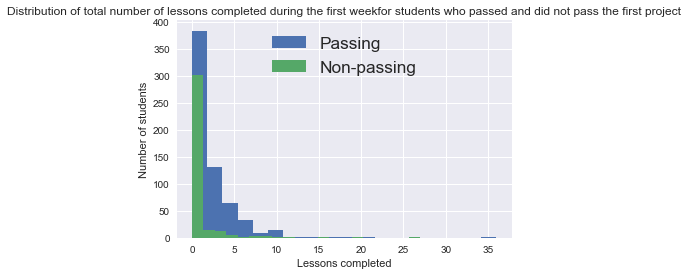

In [110]:
import seaborn as sns
sns.set()

plt.hist(si_total_lessons_completed.values(), label='Passing', bins=20)
plt.hist(no_total_lessons_completed.values(), label='Non-passing', bins=20)

legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')
legend.get_frame()
plt.xlabel("Lessons completed")
plt.ylabel("Number of students")
plt.title("Distribution of total number of lessons completed during the first week" +
          "for students who passed and did not pass the first project")


Text(0.5,1,'Distribution of total number of minutes spent in the classroom during the first weekfor students who passed and did not pass the first project')

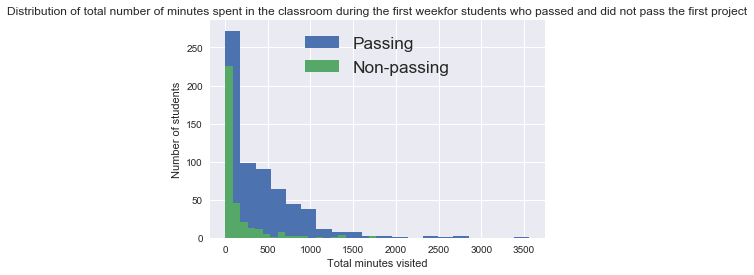

In [111]:
plt.hist(si_total_minutes_spent.values(), label='Passing', bins=20)
plt.hist(no_total_minutes_spent.values(), label='Non-passing', bins=20)

legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')
legend.get_frame()
plt.xlabel("Total minutes visited")
plt.ylabel("Number of students")
plt.title("Distribution of total number of minutes spent in the classroom during the first week" +
          "for students who passed and did not pass the first project")

Text(0.5,1,'Distribution of days spent in the classroom during the first weekfor students who passed and did not pass the first project')

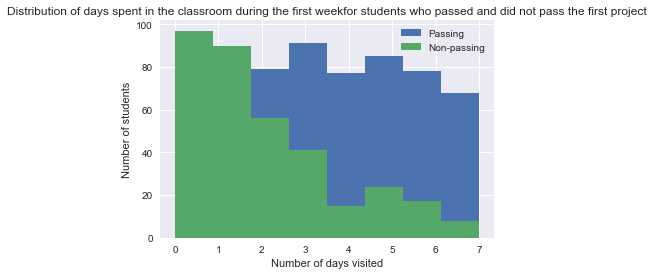

In [112]:
plt.hist(si_total_days_visited.values(), label='Passing', bins=8)
plt.hist(no_total_days_visited.values(), label='Non-passing', bins=8)

legend = plt.legend(loc='best', shadow=True, fontsize='small')
legend.get_frame()
plt.xlabel("Number of days visited")
plt.ylabel("Number of students")
plt.title("Distribution of days spent in the classroom during the first week" +
          "for students who passed and did not pass the first project")

## Improving Plots and Sharing Findings

In [113]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.